# CNN for image classification
## dataset: CIFAR-10
-  The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. 
-  There are 50000 training images and 10000 test images.

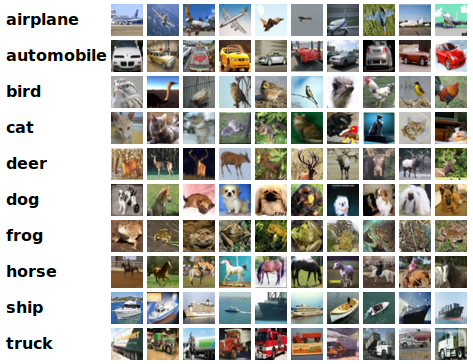

## Download dataset
Loading the dataset returns four NumPy arrays:
-  The <font color=green><b>train_images</b></font> and <font color=green><b>train_labels</b></font> arrays are the training set—the data the model uses to learn.
-  The model is tested against the test set, the <font color=red><b>test_images</b></font>, and <font color=red><b>test_labels</b></font> arrays.

-  The images are 32x32<font color=red><b>x3</b></font> NumPy arrays, with pixel values ranging between 0 and 255. 
-  The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

<td style="text-align:left;">

| Lable|Class|
|---|---|
|   0   | airplane|
|   1   | automobile    |
|   2   | bird   |
|   3   | cat      |
|   4   | deer       |
|   5   | dog     |
|   6   | frog      |
|   7   | horse    |
|   8   | ship        |
|   9   | truck |



In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.10.0


In [2]:
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
num_classes = len(class_names)

In [5]:
# train_y = keras.utils.to_categorical(train_labels, num_classes)

In [6]:
# train_y[5]

## Explore the data

In [7]:
train_images.shape

(50000, 32, 32, 3)

In [8]:
train_labels.shape

(50000, 1)

In [9]:
test_images.shape

(10000, 32, 32, 3)

In [10]:
test_labels.shape

(10000, 1)

In [11]:
train_labels[5]

array([1], dtype=uint8)

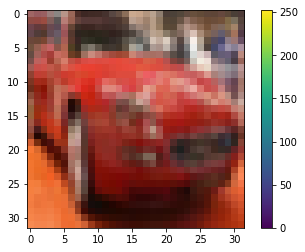

In [12]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

### Display the first 25 images

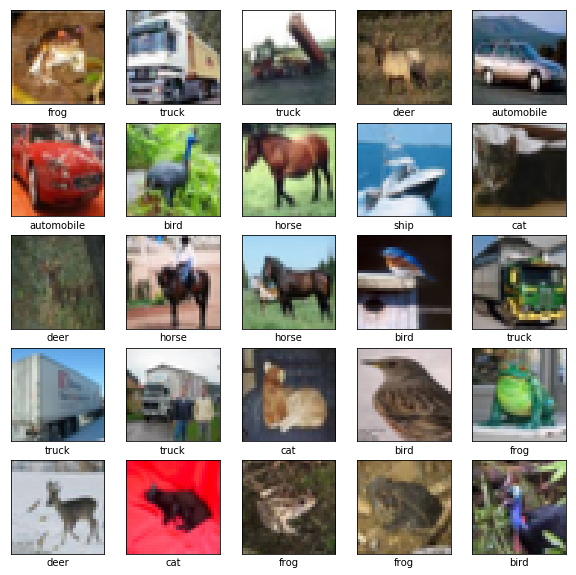

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Scale value to range 0 to 1 

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [15]:
train_images.shape

(50000, 32, 32, 3)

In [16]:
x_train=train_images.reshape((len(train_images)),-1) #for svm
x_test=test_images.reshape((len(test_images)),-1)

## Build model

In [17]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense



Using TensorFlow backend.


In [18]:
bn_axis = 3

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [19]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [21]:
# %%time
# model.fit(train_images, train_labels, epochs=5)


In [22]:
%%time
hist = model.fit(train_images, train_labels, batch_size=64 ,epochs=10, validation_data=(test_images,test_labels) )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 65s 1ms/step - loss: 1.5470 - acc: 0.4322 - val_loss: 1.2238 - val_acc: 0.5601
Epoch 2/10
50000/50000 [==============================] - 65s 1ms/step - loss: 1.1300 - acc: 0.5983 - val_loss: 0.9311 - val_acc: 0.6693
Epoch 3/10
50000/50000 [==============================] - 65s 1ms/step - loss: 0.9819 - acc: 0.6532 - val_loss: 0.8762 - val_acc: 0.6925
Epoch 4/10
50000/50000 [==============================] - 66s 1ms/step - loss: 0.8863 - acc: 0.6881 - val_loss: 0.7932 - val_acc: 0.7230
Epoch 5/10
50000/50000 [==============================] - 66s 1ms/step - loss: 0.8164 - acc: 0.7117 - val_loss: 0.7360 - val_acc: 0.7447
Epoch 6/10
50000/50000 [==============================] - 66s 1ms/step - loss: 0.7662 - acc: 0.7300 - val_loss: 0.7548 - val_acc: 0.7372
Epoch 7/10
50000/50000 [==============================] - 66s 1ms/step - loss: 0.7199 - acc: 0.7490 - val_loss: 0.7219 - val_acc

In [23]:
# list all data in history
print(hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


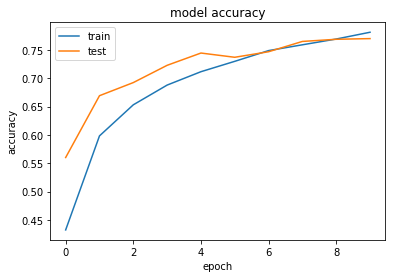

In [24]:
# summarize history for accuracy
plt.figure()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

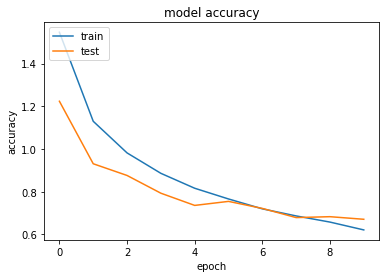

In [25]:
# summarize history for loss value
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluate on test set

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 3s 301us/step
Test accuracy: 0.7702


### Make predictions

In [27]:
predictions = model.predict(test_images)

In [28]:
predictions[2]

array([5.05612530e-02, 1.39104992e-01, 2.36251566e-04, 1.33252505e-03,
       1.11977824e-04, 9.89181426e-05, 7.93892104e-06, 1.23743361e-04,
       7.41892219e-01, 6.65301085e-02], dtype=float32)

In [29]:
np.argmax(predictions[2])

8

In [30]:
# ground truth
test_labels[2]

array([8])

In [31]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')


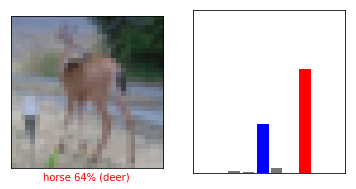

In [32]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


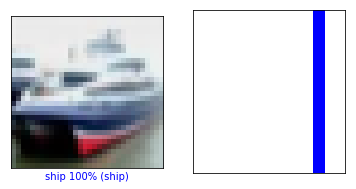

In [33]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


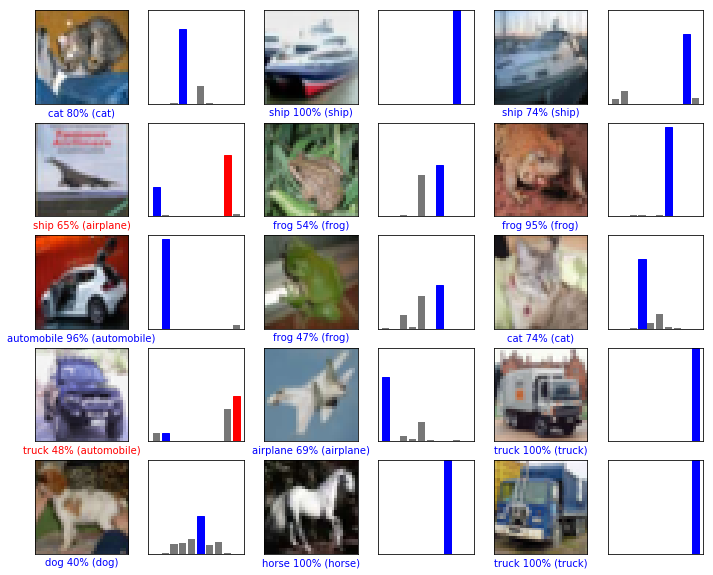

In [34]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()


### expand dim for single prediction
keras models are optimized to <b>make predictions on a batch</b>, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [35]:
img = test_images[2]
img = (np.expand_dims(img,0))
print(img.shape)


(1, 32, 32, 3)


In [36]:
predictions_single = model.predict(img)

print(predictions_single)


[[5.05612753e-02 1.39105022e-01 2.36251566e-04 1.33252633e-03
  1.11977824e-04 9.89183391e-05 7.93891377e-06 1.23743594e-04
  7.41892219e-01 6.65301457e-02]]


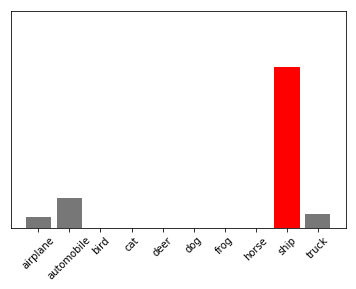

In [37]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

## svm classifier

In [38]:
from sklearn import svm

In [39]:
clf = svm.SVC(gamma='scale')

In [ ]:
clf.fit(x_train,train_labels)

/usr/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.predict(X_test)

In [ ]:
print(clf.score(X_test,test_labels))

# Exercises

## Exercise 1